In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
stocks = pd.read_csv('datasets/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('datasets/dow_jones.csv', parse_dates=['date'], index_col='date')

In [6]:
data = pd.concat([stocks, dow_jones], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA453F24E0>,
      dtype=object)

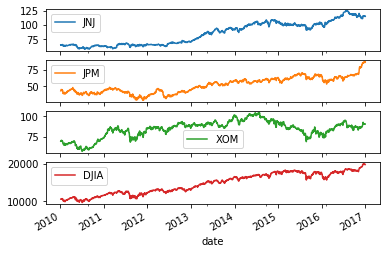

In [9]:
data.div(data.iloc[0]).mul(100)
data.plot(subplots=True)

In [16]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('datasets/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('datasets/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


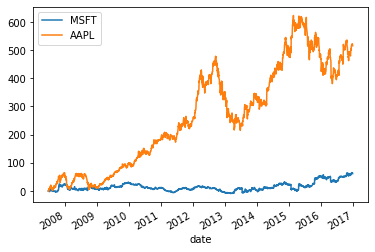

In [17]:
# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0)
diff.plot()
plt.show()


In [18]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series([1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))



2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [30]:
monthly = pd.read_csv('datasets/unrate.csv', parse_dates=True, index_col='DATE')
monthly.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [37]:
print(monthly.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 3.8 KB
None


In [48]:
weekly_dates = pd.date_range(start = monthly.index.min(), end=monthly.index.max(), freq='W')

In [49]:
weekly = monthly.reindex(weekly_dates)

In [54]:
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

In [53]:
weekly.head()

,UNRATE,ffill,interpolated
2010-01-03,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN
2010-01-17,NaN,NaN,NaN
2010-01-24,NaN,NaN,NaN
2010-01-31,NaN,NaN,NaN


# chapter 3


In [65]:
data = pd.read_csv('datasets/google.csv', parse_dates=True, index_col='Date').dropna()
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [66]:
differences=data.diff().dropna()

In [67]:
start_price = data.first('D')

In [68]:
cumulative_sum = start_price.append(differences).cumsum()

In [69]:
print(data.equals(cumulative_sum))

True


In [70]:
cumulative_sum.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [73]:
data = pd.read_csv('datasets/apple_google.csv', index_col='Date', parse_dates=True)
data.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


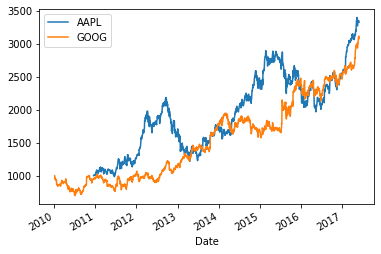

In [74]:
investment = 1000
returns = data.pct_change()
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod().mul(investment)

cumulative_return.plot()
plt.show()

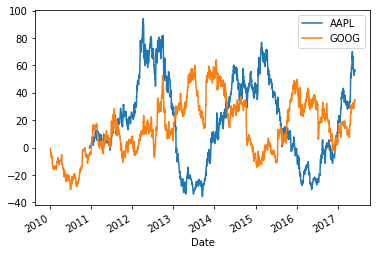

In [75]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) -1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()


## random walk

In [153]:
from numpy.random import normal, seed
from scipy.stats import norm

In [154]:
seed(42)

In [155]:
random_walk = normal(loc=0.001, scale=0.01, size=2500)

In [156]:
random_walk = pd.Series(random_walk)

In [157]:
random_prices = random_walk.add(1).cumprod()

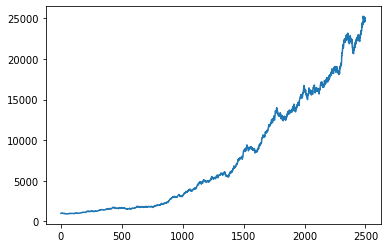

In [158]:
random_prices.mul(1000).plot()

In [159]:
import seaborn as sns
from numpy.random import choice

In [160]:
fb = pd.read_csv('datasets/fb.csv', header=None)
fb.columns = ['date', 'close']
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace = True)

fb.head()

,close
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


In [161]:
seed(42)

In [162]:
daily_returns=fb['close'].pct_change().dropna()
daily_returns.head()

date
2012-05-18    0.006053
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
Name: close, dtype: float64

In [163]:
n_obs = daily_returns.count()
print(n_obs)

1266


In [164]:
random_walk = choice(daily_returns, size=n_obs)

In [165]:
random_walk = pd.Series(random_walk)

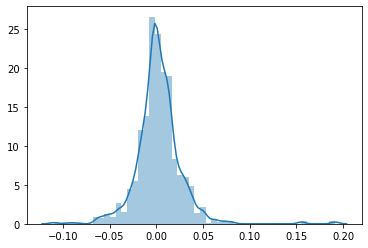

In [166]:
sns.distplot(random_walk)

## 2

In [167]:
start = fb['close'].first('D')

In [168]:
random_walk = random_walk.add(1)

In [169]:
random_price = start.append(random_walk)

In [170]:
random_price = random_price.cumprod()

In [171]:
fb['random'] = random_price

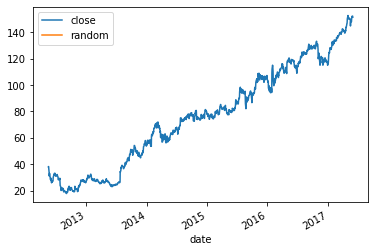

In [172]:
fb.plot()

## correlation

In [175]:
data = pd.read_csv('datasets/asset_classes.csv', parse_dates=True, index_col='DATE')
data.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [177]:
annual_prices = data.resample('A').last()

In [179]:
annual_returns = annual_prices.pct_change()

In [180]:
correlations = annual_returns.corr()

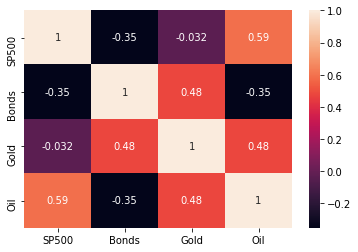

In [183]:
sns.heatmap(correlations, annot=True)